# Bolt Home Task - By Ajay Kumar

The total runtime for this jupyter notebook is under 2 mins

Outputs 

- inital_report.html (containing basic exploratory analysis of the raw data provided by Bolt)
- final_report.html (containing basic exploratory analysis of the final cleaned dataset)
- processed.csv (final processed dataset in csv format)

## Prerequisite

run the below statements in a terminal window to create the required environment and to open a jupyter notebook

* /bin/bash -c "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/HEAD/install.sh)"
* brew install anaconda
* conda create -n bolt python=3.9
* conda activate bolt
* conda install jupyterlab
* pip install --pre pycaret sklearn plotly ydata_profiling
* jupyter-lab

-- required files - test.csv (provided by Bolt)

In [102]:
# necessary imports
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
# from pycaret.regression import *
from ydata_profiling import ProfileReport
# from sklearn.impute import KNNImputer
# from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 2000)
pd.set_option('display.float_format', '{:20,.2f}'.format)
pd.set_option('display.max_colwidth', None)

# define Seaborn color palette to use
palette_color = sns.color_palette('bright')

# fucntion to detect outliers using z_score
def detect_outliers_zscore(data, thres):
    outliers = []
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers

In [2]:
# log runtime for future use
start_time = datetime.now()
print("Task started at Date::Time", ": {}".format(datetime.strftime(start_time, "%Y/%m/%d::%H-%M-%S")))

Task started at Date::Time : 2023/06/20::15-09-27


In [3]:
# read the dataset
# raw = pd.read_csv('ride.csv')
url = 'https://drive.google.com/file/d/1wwrGo_h40Tbm4zzL6wYnDmiqZ8LB4-rK/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
raw = pd.read_csv(path)

## Exploratory Data Analysis

The initial data cleaning and exploratory analysis involves several key steps, including identifying and removing duplicate rows, analyzing the data types and number of missing values, and computing a Pearson correlation matrix to identify highly correlated variables.

These steps are crucial in preparing the data for subsequent analysis and identifying potential issues or areas for further investigation.

In [4]:
# checking for duplicate rows
raw.duplicated().sum()

# no duplicate rows were found in the dataset

0

In [5]:
# analyse datatypes and null values
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4943 entries, 0 to 4942
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id_new           4943 non-null   int64  
 1   order_try_id_new       4943 non-null   int64  
 2   calc_created           4943 non-null   object 
 3   metered_price          4923 non-null   float64
 4   upfront_price          3409 non-null   float64
 5   distance               4943 non-null   int64  
 6   duration               4943 non-null   int64  
 7   gps_confidence         4943 non-null   int64  
 8   entered_by             4943 non-null   object 
 9   b_state                4943 non-null   object 
 10  dest_change_number     4943 non-null   int64  
 11  prediction_price_type  4923 non-null   object 
 12  predicted_distance     4923 non-null   float64
 13  predicted_duration     4923 non-null   float64
 14  change_reason_pricing  298 non-null    object 
 15  tick

In [6]:
columns_for_correlation = ['metered_price',
 'upfront_price',
 'distance',
 'duration',
 'gps_confidence',
 'dest_change_number',
 'predicted_distance',
 'predicted_duration',
 'eu_indicator',
 'overpaid_ride_ticket',
 'fraud_score']

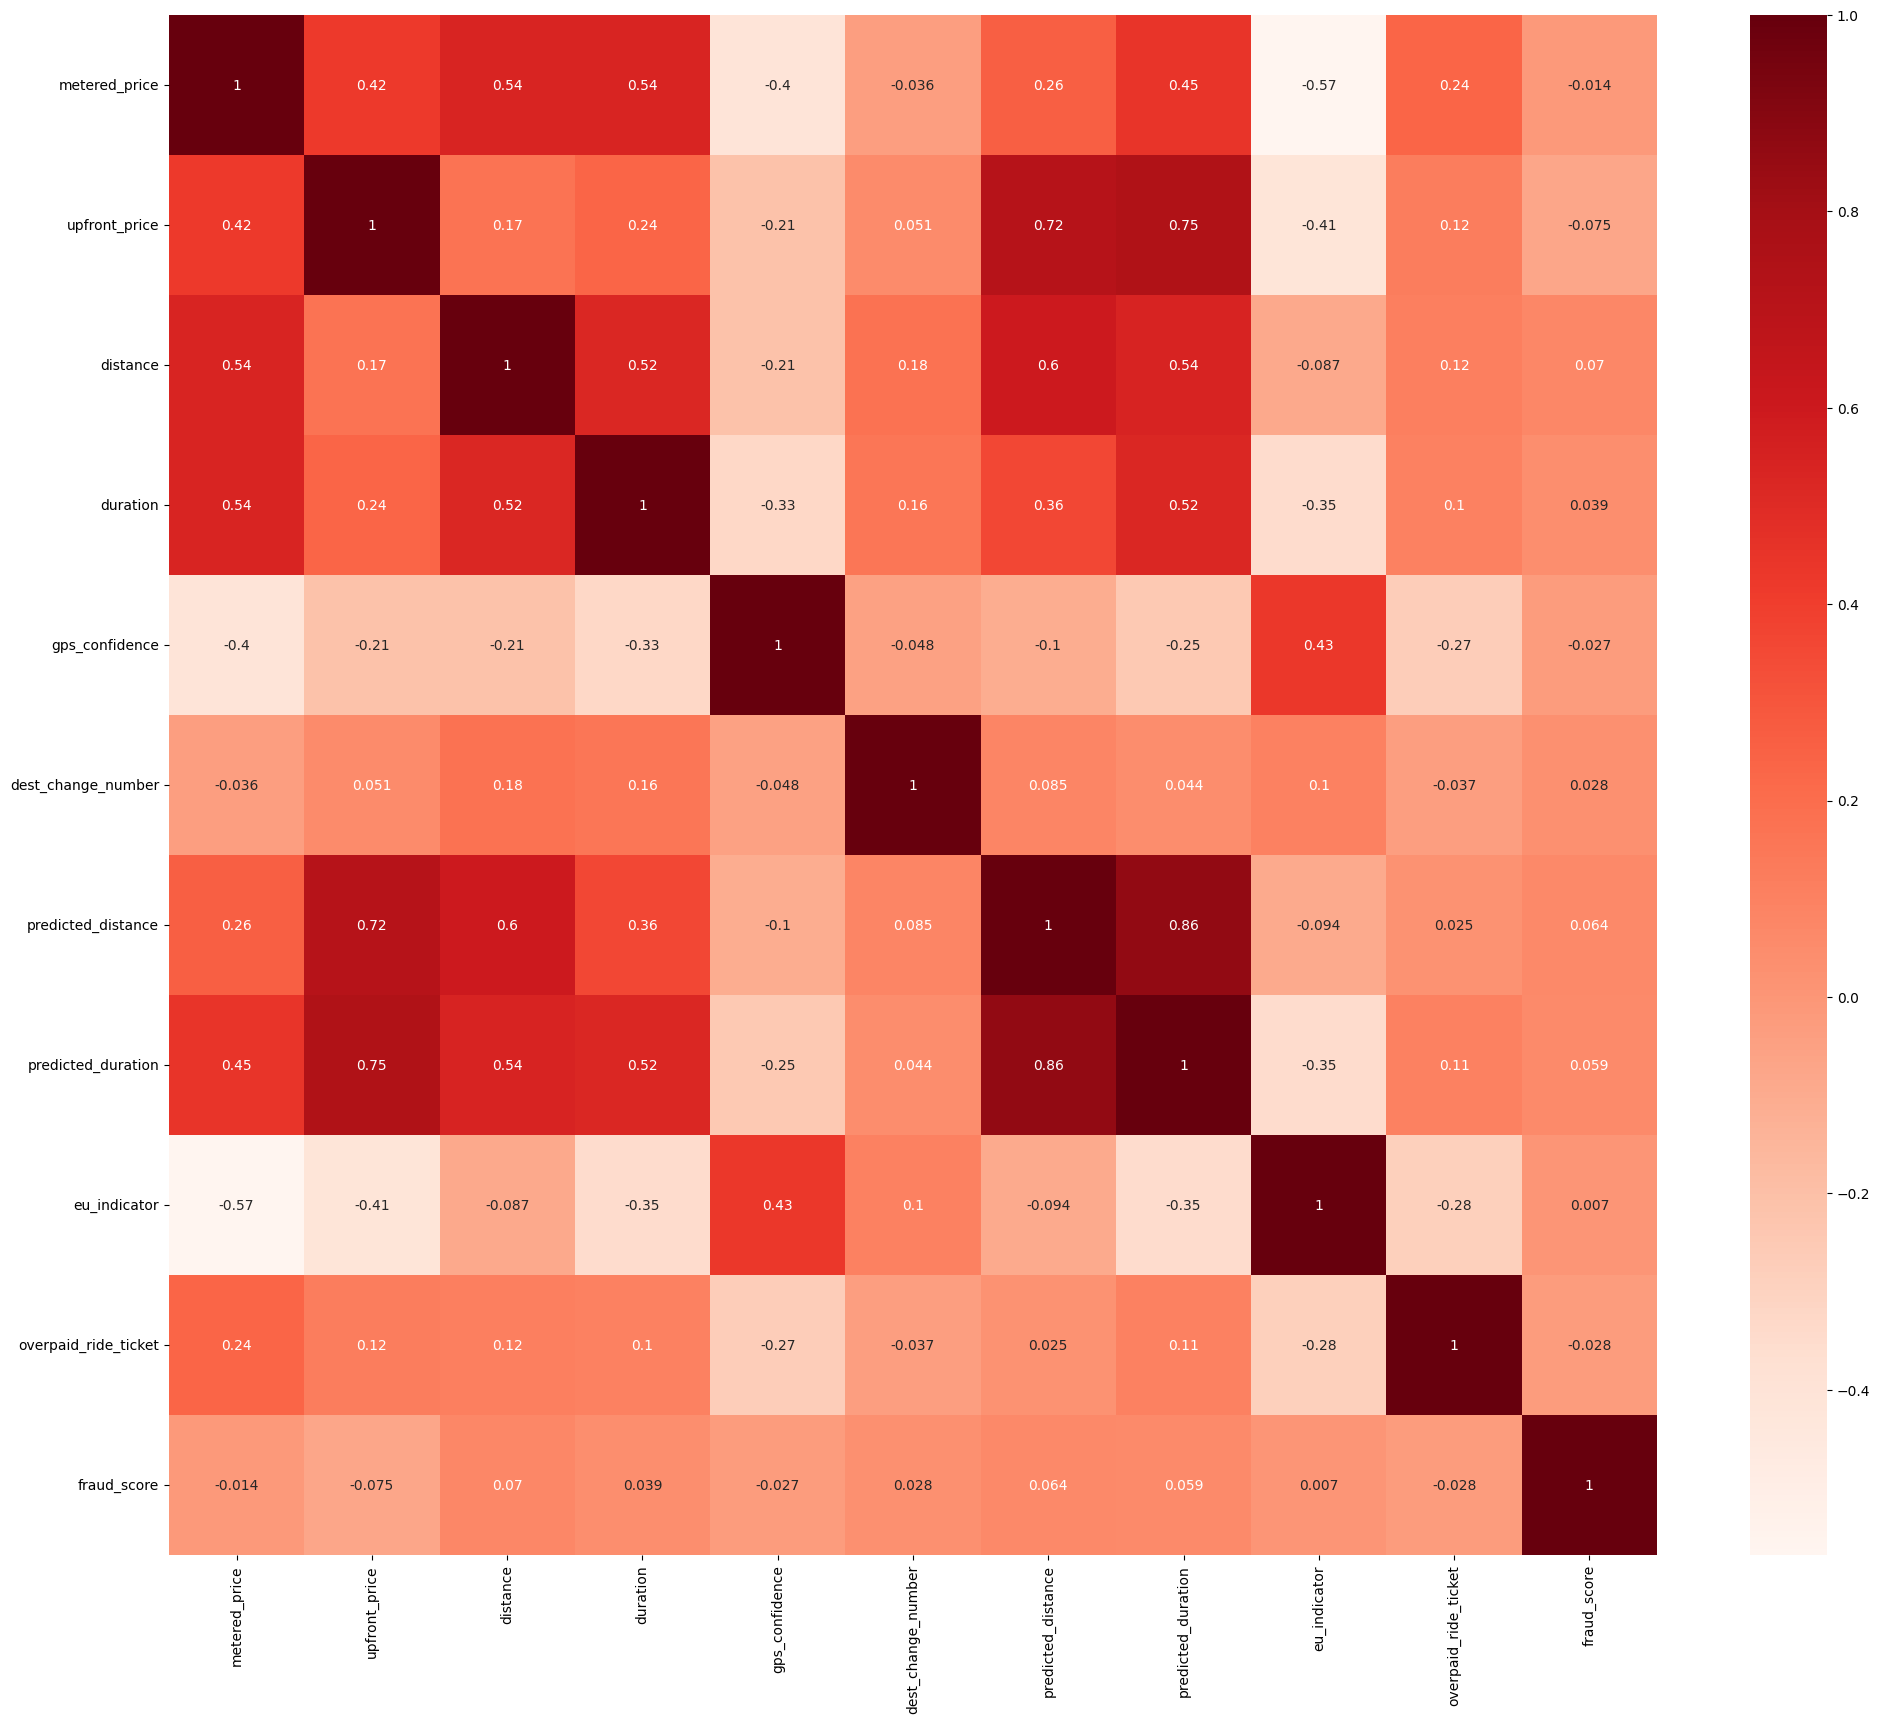

In [7]:
# check for correlation Using Pearson Correlation
plt.figure(figsize=(24,20))
cor = raw[columns_for_correlation].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [8]:
#Correlation with upfront_price variable
cor_target = abs(cor["upfront_price"])

# Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features.sort_values(ascending=False)

upfront_price                        1.00
predicted_duration                   0.75
predicted_distance                   0.72
Name: upfront_price, dtype: float64

The high correlation between upfront_price and predicted_duration/predicted_distance suggests that the predicted duration and distance are significant predictors of upfront pricing. This means that the model used for predicting upfront prices appears to rely heavily on predicted duration and distance to calculate the upfront price. 

This information is useful in understanding how the upfront pricing is determined and what factors are considered in predicting it. The high correlation also indicates that improving the accuracy of predicted duration and distance can lead to a more precise upfront pricing calculation, which can ultimately lead to better customer satisfaction and improved business performance.

In [9]:
#Correlation with metered_price variable
cor_target = abs(cor["metered_price"])

# Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features.sort_values(ascending=False)

metered_price                   1.00
eu_indicator                    0.57
distance                        0.54
duration                        0.54
Name: metered_price, dtype: float64

If metered_price is correlated with eu_indicator, actual distance, and actual duration, it may suggest that these variables play a role in determining the price of a ride. 

For example, if rides in the EU tend to have higher prices compared to non-EU rides, the eu_indicator variable would be a significant predictor of metered_price. Similarly, if longer distances and durations tend to result in higher prices, actual distance and duration would also be important predictors.

By understanding these correlations, the ride-hailing company can identify which variables are most influential in determining price and use this information to improve their upfront pricing algorithms. They can also use this information to better understand customer behavior and preferences, such as whether customers are willing to pay more for longer rides or rides within the EU.

In [10]:
# prepare initial report
profile = ProfileReport(raw, title="Inital Report")
profile.to_file("initial_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Analysing the missing rows

In [11]:
raw.isna().sum()

order_id_new                0
order_try_id_new            0
calc_created                0
metered_price              20
upfront_price            1534
distance                    0
duration                    0
gps_confidence              0
entered_by                  0
b_state                     0
dest_change_number          0
prediction_price_type      20
predicted_distance         20
predicted_duration         20
change_reason_pricing    4645
ticket_id_new               0
device_token             4943
rider_app_version          16
order_state                 0
order_try_state             0
driver_app_version          0
driver_device_uid_new       0
device_name                 0
eu_indicator                0
overpaid_ride_ticket        0
fraud_score              2759
dtype: int64

The top 4 columns with missing values are 

device_token (100 %) - doesn't have any statistical value for the analysis.

- id for a device_token

change_reason_pricing (93% missing) - Can be handled by adding a new category, based on the desceiption provided below.

- indicates whose action triggered a change in the price prediction. If it is empty, it means that either nobody changed the destination or that the change has not affected the predicted price.

fraud_score (56% missing) - The computation of the fraud score is a multifaceted process that relies on numerous factors. As such, a basic imputation method would not yield precise values for missing rows in the data analysis.

- fraud score of a rider. The higher it is the more likely the rider will cheat.

upfront_price (31% missing) - To accurately evaluate the overall pricing accuracy of the model, it is essential to consider the upfront pricing. While machine learning models can be utilized to estimate missing values for this column, in this analysis, the data has been segregated into two parts - one with upfront pricing available and the other without upfront pricing - to facilitate a more detailed examination.

- promised to the rider price, based on predicted duration (predicted_duration) and distance (predicted_distance)

In [12]:
# checking if the missing values in 
# 'metered_price', 'prediction_price_type', 'predicted_distance', 'predicted_duration', 'rider_app_version'
# belong to the same rows

raw[raw['predicted_duration'].isna()][['metered_price', 'prediction_price_type', 'predicted_distance', 'predicted_duration','rider_app_version']]

metered_price prediction_price_type  predicted_distance  predicted_duration rider_app_version
64              NaN                   NaN                 NaN                 NaN               NaN
393             NaN                   NaN                 NaN                 NaN               NaN
458             NaN                   NaN                 NaN                 NaN               NaN
513             NaN                   NaN                 NaN                 NaN           CA.5.26
779             NaN                   NaN                 NaN                 NaN               NaN
998             NaN                   NaN                 NaN                 NaN               NaN
1206            NaN                   NaN                 NaN                 NaN           CI.4.17
1287            NaN                   NaN                 NaN                 NaN               NaN
1340            NaN                   NaN                 NaN                 NaN               NaN
1582            NaN                   NaN                 NaN                 NaN           CI.3.22
1603            NaN                   NaN                 NaN                 NaN               NaN
1919            NaN                   NaN                 NaN                 NaN               NaN
2213            NaN                   NaN                 NaN                 NaN           CI.4.17
2321            NaN                   NaN                 NaN                 NaN               NaN
2603            NaN                   NaN                 NaN                 NaN               NaN
2649            NaN                   NaN                 NaN                 NaN               NaN
2717            NaN                   NaN                 NaN                 NaN               NaN
3166            NaN                   NaN                 NaN                 NaN               NaN
4339            NaN                   NaN                 NaN                 NaN               NaN
4747            NaN                   NaN                 NaN                 NaN               NaN

As anticipated the missing values in 'metered_price', 'prediction_price_type', 'predicted_distance', 'predicted_duration', 'rider_app_version' belong to the same rows.

In [13]:
# overall distribution of upfront_price
missing_count = raw[raw['upfront_price'].isna()].shape[0]
present_count = raw[~raw['upfront_price'].isna()].shape[0]
total_count = raw.shape[0]
data = [missing_count, present_count]
print(data)
fig = px.pie(values=data, names=['missing_upfront_price', 'present_upfront_price'],
             title = "Distribution of Rides by Upfront Price", width=700, height=400)
fig.show()

[1534, 3409]


### Checking if there are any patterns to the missing rows in upfront_price with prediction_price_type

In [14]:
# overall distribution of prediction_price_type
data = raw['prediction_price_type'].value_counts()
print(data)
fig = px.pie(values=data.to_list(), names=data.index.to_list(),
             title = "Distribution of Prediction Price Type", width=700, height=400)
fig.show()

upfront                        3432
prediction                     1279
upfront_destination_changed     208
upfront_waypoint_changed          4
Name: prediction_price_type, dtype: int64


In [15]:
# distribution of prediction_price_type when upfront_price is missing
data = raw[raw['upfront_price'].isna()]['prediction_price_type'].value_counts()
print(data)
fig = px.pie(values=data.to_list(), names=data.index.to_list(),
             title = "Distribution of Prediction Price Type when Upfront Price is Missing", width=700, height=400)

fig.show()

prediction                     1279
upfront_destination_changed     208
upfront                          23
upfront_waypoint_changed          4
Name: prediction_price_type, dtype: int64


In almost 98% of cases where upfront_price is missing, the prediction_price_type is either 'prediction' or 'upfront_destination_changed'.

In [16]:
# cases where both upfront_price was missing and prediction_price_type was upfront
raw[(raw['upfront_price'].isna()) & (raw['prediction_price_type']=='upfront')][['entered_by', 'change_reason_pricing', 'eu_indicator', 'gps_confidence', 'overpaid_ride_ticket']]


entered_by change_reason_pricing  eu_indicator  gps_confidence  overpaid_ride_ticket
284      client                   NaN             1               0                     1
296      client                   NaN             1               0                     0
328      client                   NaN             1               0                     0
639      client                   NaN             1               0                     0
782      client                   NaN             1               0                     0
1546     client                   NaN             1               0                     0
1804     driver                   NaN             1               0                     1
2168     client                   NaN             1               0                     0
2686     client                   NaN             1               0                     0
2695     client                   NaN             1               0                     0
3076     client                   NaN             1               0                     0
3354     client                   NaN             1               0                     0
3379     client                   NaN             1               0                     0
3686     driver                   NaN             1               0                     0
3925     client                   NaN             1               0                     1
4069     client                   NaN             1               0                     0
4148     client                   NaN             1               0                     0
4340     client                   NaN             1               0                     0
4480     client                   NaN             1               0                     0
4617     client                   NaN             1               0                     0
4698     client                   NaN             1               0                     0
4781     client                   NaN             1               0                     0
4788     client                   NaN             1               0                     1

In [17]:
# cases where both upfront_price was missing and prediction_price_type was upfront
raw[(raw['upfront_price'].isna()) & (raw['prediction_price_type']=='upfront_waypoint_changed')][['entered_by', 'change_reason_pricing', 'eu_indicator', 'gps_confidence', 'overpaid_ride_ticket']]


entered_by    change_reason_pricing  eu_indicator  gps_confidence  overpaid_ride_ticket
1334     client  driver_waypoint_changed             1               1                     0
1733     client  driver_waypoint_changed             1               1                     0
1736     client  driver_waypoint_changed             1               1                     0
2160     client  driver_waypoint_changed             1               1                     0

Two additional cases, comprising 1.8% of the total, fall under the prediction_price_type categories of upfront and upfront_waypoint_changed. 

Notable findings for this category include:
- The prediction_price_type of upfront has 23 instances where upfront pricing is missing, which is unusual as this prediction type typically includes data for upfront pricing. These cases occurred exclusively in the EU and had no gps confidence or specific change_reason_pricing indicated.
- The prediction_price_type of upfront_waypoint_changed has 4 instances where upfront pricing is missing. All these cases occurred in the EU and had change_reason_pricing indicated as driver_waypoint_changed with gps_confidence present in all the cases.

### Checking if there are any patterns to the missing rows in upfront_price with GPS Confidence

In [18]:
# overall distribution of gps_confidence
data = raw['gps_confidence'].value_counts()
print(data)
fig = px.pie(values=data.to_list(), names=data.index.to_list(),
             title = "Distribution of GPS Confidence", width=700, height=400)

fig.show()

1    3958
0     985
Name: gps_confidence, dtype: int64


In [19]:
# distribution of gps_confidence when upfront_price is missing
data = raw[raw['upfront_price'].isna()]['gps_confidence'].value_counts()
print(data)
fig = px.pie(values=data.to_list(), names=data.index.to_list(),
             title = "Distribution of GPS Confidence when Upfront Price is Missing", width=700, height=400)

fig.show()

1    921
0    613
Name: gps_confidence, dtype: int64


In [20]:
raw[(raw['upfront_price'].isna())&(raw['gps_confidence']==False)].shape[0]*100/raw[(raw['gps_confidence']==False)].shape[0]

62.233502538071065

62% of the total gps_confidence being false cases doesn't have upfront_price amounting to 613 rides (12% of overall rides), this suggests that gps_confidence is essential to determine upfront_price.

### Checking if there are any patterns to the missing rows in upfront_price with change_reason_pricing

In [21]:
raw['change_reason_pricing'].value_counts()

driver_destination_changed    150
client_destination_changed    142
driver_waypoint_changed         6
Name: change_reason_pricing, dtype: int64

In [22]:
raw[(raw['upfront_price'].isna())]['change_reason_pricing'].value_counts()

driver_destination_changed    150
client_destination_changed    110
driver_waypoint_changed         6
Name: change_reason_pricing, dtype: int64

Based on the analysis conducted, it was observed that in all instances where the change_reason_pricing is either driver_destination_changed or driver_waypoint_changed, upfront_price was found to be missing. On the other hand, in 77% of cases where change_reason_pricing was identified as client_destination_changed, upfront_price was also found to be missing.

### Checking if there are any patterns to the missing rows in upfront_price with eu_indicator

In [23]:
# distribution of eu_indicator
data = raw['eu_indicator'].value_counts()
print(data)
fig = px.pie(values=data.to_list(), names=data.index.to_list(),
             title = "Distribution of EU Indicator", width=700, height=400)

fig.show()

1    2770
0    2173
Name: eu_indicator, dtype: int64


In [24]:
# distribution of eu_indicator when upfront_price is missing
data = raw[(raw['upfront_price'].isna())]['eu_indicator'].value_counts()
print(data)
fig = px.pie(values=data.to_list(), names=data.index.to_list(),
             title = "Distribution of EU Indicator when Upfront Price is Missing", width=700, height=400)

fig.show()

0    1291
1     243
Name: eu_indicator, dtype: int64


Based on the available data, it was observed that in 84% of the cases where upfront_price was missing, the corresponding ride took place outside of Europe. This indicates that, on average, the ride-hailing application is better equipped to provide accurate fare predictions within Europe than outside of it.

### Checking if there are any patterns to the missing rows in upfront_price with overpaid_ride_ticket

In [25]:
# distribution of overpaid_ride_ticket
data = raw['overpaid_ride_ticket'].value_counts()
print(data)
fig = px.pie(values=data.to_list(), names=data.index.to_list(),
             title = "Distribution of Overpaid Ride Ticket", width=700, height=400)

fig.show()

0    4606
1     337
Name: overpaid_ride_ticket, dtype: int64


In [26]:
raw[(raw['upfront_price'].isna())&(raw['overpaid_ride_ticket']==1)].shape[0]*100/raw[(raw['overpaid_ride_ticket']==1)].shape[0]

67.95252225519287

In [27]:
#  distribution of overpaid ride tickets with upfront price
missing_count = raw[(raw['upfront_price'].isna())&(raw['overpaid_ride_ticket']==1)].shape[0]
present_count = raw[~(raw['upfront_price'].isna())&(raw['overpaid_ride_ticket']==1)].shape[0]
total_count = raw.shape[0]
data = [missing_count, present_count]
print(data)
fig = px.pie(values=data, names=['missing_upfront_price', 'present_upfront_price'],
             title = "Distribution of Overpaid Ride Tickets with Upfront Price", width=700, height=400)
fig.show()


[229, 108]


In 68% of the cases when an overpaid_ride_ticket has been raised, upfront_price was found to be missing.

In [28]:
# distribution of gps_confidence when overpaid_ride_ticket is true
data = raw[(raw['overpaid_ride_ticket']==True)]['gps_confidence'].value_counts()
print(data)
fig = px.pie(values=data.to_list(), names=data.index.to_list(),
             title = "Distribution of GPS Confidence when Overpaid Ride Ticket is raised", width=700, height=400)

fig.show()

0    201
1    136
Name: gps_confidence, dtype: int64


In [29]:
# distribution of eu_indicator when overpaid_ride_ticket is true
data = raw[(raw['overpaid_ride_ticket']==True)]['eu_indicator'].value_counts()
print(data)
fig = px.pie(values=data.to_list(), names=data.index.to_list(),
             title = "Distribution of EU Indicator when Overpaid Ride Ticket is raised", width=700, height=400)

fig.show()

0    324
1     13
Name: eu_indicator, dtype: int64


Additional Insights:
- Upon further analysis, it was found that in cases where an overpaid_ride_ticket was raised and upfront_price was missing, almost 60% of these cases were associated with poor GPS confidence.
- Additionally, it was observed that in cases where an overpaid_ride_ticket was raised and upfront_price was missing, almost 96% of these cases occurred outside of Europe.
- Of all instances where an overpaid_ride_ticket was raised, almost 96% occurred outside of Europe.

## Data preprocessing based on the exploratory analysis

- Remove columns that do not provide significant value for the analysis, such as device_token, b_state, order_state, order_try_state, order_id_new, order_try_id_new and fraud_score (56% missing).
- Assign appropriate data types to each column to ensure consistency in data representation and analysis.
- Address missing values and outliers in the data set using optimal methods to maintain data integrity and minimize bias.

In [30]:
# select the required columns
df = raw[['ticket_id_new','calc_created', 'metered_price', 'upfront_price', 'distance','duration',
       'gps_confidence', 'entered_by', 'dest_change_number', 'prediction_price_type',
       'change_reason_pricing', 'rider_app_version', 'driver_app_version', 'driver_device_uid_new',
       'device_name', 'eu_indicator', 'overpaid_ride_ticket', 'predicted_distance', 'predicted_duration']]

id_cols = ['ticket_id_new', 'driver_device_uid_new']

# assign appropiate datatypes
df['calc_created'] = pd.to_datetime(df['calc_created'])
df['driver_device_uid_new'] = df['driver_device_uid_new'].astype('object')

In [31]:
# separate the columns by type
numeric_columns = [] 
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
categorical_columns = []
categorical_columns = df.select_dtypes(include='object').columns.tolist()
other_cols = []
other_cols = list(set(df.columns) - set(numeric_columns).union(set(categorical_columns))) 

### Handling Missing Values using Imputation 

For change_reason_pricing, a new category ("No Change") has been added to account for the missing values in this categorical column. 

In [32]:
# Imputing categorical missing values
df['change_reason_pricing'].fillna('no_change', inplace=True) # manual imputation - since 93% of the values are missing

In [33]:
df.isna().sum()

ticket_id_new               0
calc_created                0
metered_price              20
upfront_price            1534
distance                    0
duration                    0
gps_confidence              0
entered_by                  0
dest_change_number          0
prediction_price_type      20
change_reason_pricing       0
rider_app_version          16
driver_app_version          0
driver_device_uid_new       0
device_name                 0
eu_indicator                0
overpaid_ride_ticket        0
predicted_distance         20
predicted_duration         20
dtype: int64

In [34]:
df.shape

(4943, 19)

Due to the importance of upfront_price in computing pricing accuracy, I have opted not to include rows where this variable is missing. This decision was made to ensure that the analysis is not biased due to imputation.

In [35]:
df = df[df['upfront_price'].notna()]
df.shape

(3409, 19)

In [36]:
df.isna().sum()

ticket_id_new            0
calc_created             0
metered_price            0
upfront_price            0
distance                 0
duration                 0
gps_confidence           0
entered_by               0
dest_change_number       0
prediction_price_type    0
change_reason_pricing    0
rider_app_version        0
driver_app_version       0
driver_device_uid_new    0
device_name              0
eu_indicator             0
overpaid_ride_ticket     0
predicted_distance       0
predicted_duration       0
dtype: int64

As all other columns have been found to be complete after the exclusion of rows with missing upfront_price values, additional imputation is deemed unnecessary.

In [37]:
# df[categorical_columns] = df[categorical_columns].fillna(df.mode().iloc[0]) # using mode to impute
# df[numeric_columns] = df[numeric_columns].fillna(df.mean().iloc[0]) # using mean to impute

### Outlier Detection Logic

- I have used a standard z-score with a threshold of 2 standard deviation to detect outliers

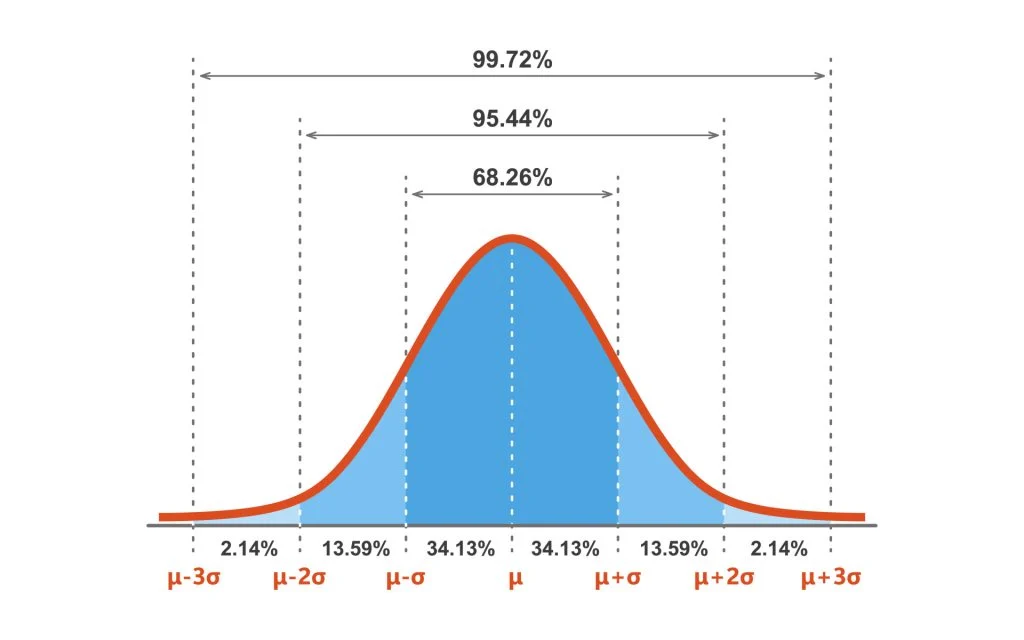

Z-score method is a simple and easy-to-use statistical technique for detecting outliers in a dataset. It works by identifying points that are far away from the mean of the dataset in terms of standard deviation. 

One of the key benefits of using the z-score method is that it is based on a clear statistical definition of what constitutes an outlier, making it more objective than other outlier detection methods that may rely on subjective thresholds or assumptions.

Another advantage of the z-score method is that it is sensitive to both positive and negative deviations from the mean, allowing it to detect outliers in both directions. This makes it more robust than other methods that may only detect outliers in one direction.

In [38]:
columns_for_outlier_detection = ['upfront_price', 'predicted_distance', 'predicted_duration', 'metered_price', 'distance', 'duration']

In [39]:
# check for outliers in numeric columns with 2 standard deviation
threshold = 2
for col in columns_for_outlier_detection:
    mean = np.mean(df[col], axis=0)
    sd = np.std(df[col], axis=0)
    perc = round(df[(df[col] > (mean+(threshold*sd))) | (df[col] < (mean-(threshold*sd)))].shape[0]*100/df.shape[0], 2)
    print("Percentage of Outliers in ", col, " :", perc, "%\n")

Percentage of Outliers in  upfront_price  : 1.2 %

Percentage of Outliers in  predicted_distance  : 1.85 %

Percentage of Outliers in  predicted_duration  : 2.49 %

Percentage of Outliers in  metered_price  : 3.7 %

Percentage of Outliers in  distance  : 3.81 %

Percentage of Outliers in  duration  : 4.37 %



In [40]:
# check for outliers in numeric columns with 2 standard deviation
outliers_array = []
for col in columns_for_outlier_detection:
    outliers = detect_outliers_zscore(df[col], threshold)
    #print("Outliers from Z-scores method: ", outliers)
    outliers_array.append(outliers)
    print("Number of Outliers in ", col, " :",len(outliers), "\n")

Number of Outliers in  upfront_price  : 41 

Number of Outliers in  predicted_distance  : 63 

Number of Outliers in  predicted_duration  : 85 

Number of Outliers in  metered_price  : 126 

Number of Outliers in  distance  : 130 

Number of Outliers in  duration  : 149 



In [41]:
# Inital boxplots of numeric columns
px.box(df[columns_for_outlier_detection].melt(), y='value', width=1300, height=500,
       facet_col='variable').update_yaxes(matches=None)

In [42]:
# inital scatter plots with OLS (Ordinary Least Squares regression line)
fig = px.scatter(df, x='upfront_price', y='metered_price', trendline="ols", 
                 trendline_color_override="#6aa84f" ,marginal_x="box", marginal_y="box",
                 title="Scatter Plot of Upfront Price with Metered Price", width=1000, height=800)
fig.show()

# r2 = 0.17

In [43]:
fig = px.scatter(df, x='distance', y='duration', trendline="ols", 
                 trendline_color_override="#6aa84f" ,marginal_x="box", marginal_y="box",
                 title="Scatter Plot of Distance with Duration", width=1000, height=800)
fig.show()

# r2 = 0.37

In [44]:
fig = px.scatter(df, x='predicted_distance', y='predicted_duration', trendline="ols", 
                 trendline_color_override="#6aa84f" ,marginal_x="box", marginal_y="box",
                 title="Scatter Plot of Predicted Distance with Predicted Duration", width=1000, height=800)
fig.show()

# r2 = 0.79

In [45]:
# check point
temp = df.copy()

In [46]:
# removing outliers from the dataset

initial_rows = len(df)
i = 0
for col in columns_for_outlier_detection:
    print("Handling outliers in ", col, " - ", len(outliers_array[i]), " outliers")
    print("Inital Size - ", df.shape)
    df = df[~df[col].isin(outliers_array[i])]
    i = i+1
    print("Final Size - ", df.shape, "\n")

final_rows = len(df)

print("Percentage of rows removed as outliers - ", round(((initial_rows-final_rows)*100/initial_rows),2))
    


Handling outliers in  upfront_price  -  41  outliers
Inital Size -  (3409, 19)
Final Size -  (3368, 19) 

Handling outliers in  predicted_distance  -  63  outliers
Inital Size -  (3368, 19)
Final Size -  (3326, 19) 

Handling outliers in  predicted_duration  -  85  outliers
Inital Size -  (3326, 19)
Final Size -  (3286, 19) 

Handling outliers in  metered_price  -  126  outliers
Inital Size -  (3286, 19)
Final Size -  (3206, 19) 

Handling outliers in  distance  -  130  outliers
Inital Size -  (3206, 19)
Final Size -  (3181, 19) 

Handling outliers in  duration  -  149  outliers
Inital Size -  (3181, 19)
Final Size -  (3122, 19) 

Percentage of rows removed as outliers -  8.42


In [47]:
# Final boxplots of numeric columns
px.box(df[columns_for_outlier_detection].melt(), y='value', width=1300, height=500,
       facet_col='variable').update_yaxes(matches=None)

In [48]:
# final scatter plots with OLS (Ordinary Least Squares regression line)
fig = px.scatter(df, x='upfront_price', y='metered_price', trendline="ols", 
                 trendline_color_override="#6aa84f" ,marginal_x="box", marginal_y="box",
                 title="Scatter Plot of Upfront Price with Metered Price", width=1000, height=800)
fig.show()

# r2 = 0.76 (previous 0.17)

In [49]:
fig = px.scatter(df, x='distance', y='duration', trendline="ols", 
                 trendline_color_override="#6aa84f" ,marginal_x="box", marginal_y="box",
                 title="Scatter Plot of Distance with Duration", width=1000, height=800)
fig.show()

# # r2 = 0.44 (previous 0.37)

In [50]:
fig = px.scatter(df, x='predicted_distance', y='predicted_duration', trendline="ols", 
                 trendline_color_override="#6aa84f" ,marginal_x="box", marginal_y="box",
                 title="Scatter Plot of Predicted Distance with Predicted Duration", width=1000, height=800)
fig.show()

# r2 = 0.65 (previous 0.79)

In [51]:
cleaned_df = df.copy()
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3122 entries, 0 to 4941
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ticket_id_new          3122 non-null   int64         
 1   calc_created           3122 non-null   datetime64[ns]
 2   metered_price          3122 non-null   float64       
 3   upfront_price          3122 non-null   float64       
 4   distance               3122 non-null   int64         
 5   duration               3122 non-null   int64         
 6   gps_confidence         3122 non-null   int64         
 7   entered_by             3122 non-null   object        
 8   dest_change_number     3122 non-null   int64         
 9   prediction_price_type  3122 non-null   object        
 10  change_reason_pricing  3122 non-null   object        
 11  rider_app_version      3122 non-null   object        
 12  driver_app_version     3122 non-null   object        
 13  dri

In [52]:
cleaned_df.describe()

ticket_id_new        metered_price        upfront_price             distance             duration       gps_confidence   dest_change_number         eu_indicator  overpaid_ride_ticket   predicted_distance   predicted_duration
count             3,122.00             3,122.00             3,122.00             3,122.00             3,122.00             3,122.00             3,122.00             3,122.00              3,122.00             3,122.00             3,122.00
mean              2,374.79             2,374.47             2,258.04             7,149.50               982.93                 0.92                 1.05                 0.78                  0.03             6,991.71               879.53
std               1,307.73             5,435.50             4,912.72             5,188.37               676.88                 0.27                 0.32                 0.41                  0.16             4,525.87               454.03
min                   0.00                 2.00                 2.00                 0.00                 0.00                 0.00                 1.00                 0.00                  0.00                21.00                 2.00
25%               1,391.25                 4.28                 4.00             3,420.25               513.00                 1.00                 1.00                 1.00                  0.00             3,692.50               537.25
50%               2,328.50                 6.82                 6.15             6,053.00               839.00                 1.00                 1.00                 1.00                  0.00             5,898.00               789.00
75%               3,310.75                14.28                13.10             9,891.50             1,289.75                 1.00                 1.00                 1.00                  0.00             9,170.50             1,123.00
max               4,938.00            32,955.78            36,000.00            28,042.00             3,853.00                 1.00                 7.00                 1.00                  1.00            27,960.00             2,586.00

## Feature engineering new columns 

- Upfront pricing accuracy was evaluated by calculating the percentage difference between metered_price and upfront_price. A difference of less than or equal to 20% was classified as accurate, while a difference greater than 20% was classified as inaccurate.

- The calc_created (datetime) column was used to generate additional variables, including date, time_of_the_day (divided into four 6-hour intervals), and day_of_the_week.

- Rider_app_version and driver_app_version were simplified to their major release versions.

- Device brand was identified from the device_name variable.

- The dest_change_number variable was converted from a numerical to a categorical variable by assigning the label "changed" if the value was greater than 1 and "not_changed" otherwise.

- Continuous variables in the dataset were binned using 5 quantile cut.

In [53]:
# stripping device brand from device_name - the only extensive manual work of the project :)
conditions = [
    (cleaned_df['device_name'].str.contains('Alps')),
    (cleaned_df['device_name'].str.contains('Asus')),
    (cleaned_df['device_name'].str.contains('Blackview')),
    (cleaned_df['device_name'].str.contains('BLU')),
    (cleaned_df['device_name'].str.contains('BullittGroupLimited')),
    (cleaned_df['device_name'].str.contains('Cat')),
    (cleaned_df['device_name'].str.contains('Coolpad')),
    (cleaned_df['device_name'].str.contains('COSMO')),
    (cleaned_df['device_name'].str.contains('CUBOT')),
    (cleaned_df['device_name'].str.contains('DIGMA')),
    (cleaned_df['device_name'].str.contains('DOOGEE')),
    (cleaned_df['device_name'].str.contains('E1')),
    (cleaned_df['device_name'].str.contains('Fero')),
    (cleaned_df['device_name'].str.contains('FISE')),
    (cleaned_df['device_name'].str.contains('Foxconn')),
    (cleaned_df['device_name'].str.contains('FUJITSU')),
    (cleaned_df['device_name'].str.contains('Google')),
    (cleaned_df['device_name'].str.contains('HighScreen')),
    (cleaned_df['device_name'].str.contains('HMD Global')),
    (cleaned_df['device_name'].str.contains('HTC')),
    (cleaned_df['device_name'].str.contains('HUAWEI')),
    (cleaned_df['device_name'].str.contains('Infinix') | cleaned_df['device_name'].str.contains('INFINIX')),
    (cleaned_df['device_name'].str.contains('iPhone')),
    (cleaned_df['device_name'].str.contains('Itel') | cleaned_df['device_name'].str.contains('ITEL MOBILE')), 
    (cleaned_df['device_name'].str.contains('JUST5')),
    (cleaned_df['device_name'].str.contains('KONKA')),
    (cleaned_df['device_name'].str.contains('LAVA')),
    (cleaned_df['device_name'].str.contains('LENOVO')),
    (cleaned_df['device_name'].str.contains('LGE LG') | cleaned_df['device_name'].str.contains('LGE LM')),
    (cleaned_df['device_name'].str.contains('Meizu')),
    (cleaned_df['device_name'].str.contains('Motorola')),
    (cleaned_df['device_name'].str.contains('OnePlus')),
    (cleaned_df['device_name'].str.contains('OPPO')),
    (cleaned_df['device_name'].str.contains('Prestigio')),
    (cleaned_df['device_name'].str.contains('Samsung')),
    (cleaned_df['device_name'].str.contains('SHARP')),
    (cleaned_df['device_name'].str.contains('Sony')),
    (cleaned_df['device_name'].str.contains('TCL')),
    (cleaned_df['device_name'].str.contains('TECNO')),
    (cleaned_df['device_name'].str.contains('TP-Link')),
    (cleaned_df['device_name'].str.contains('Ulefone')),
    (cleaned_df['device_name'].str.contains('Vodafone')),
    (cleaned_df['device_name'].str.contains('Welcome')),
    (cleaned_df['device_name'].str.contains('Wheatek')),
    (cleaned_df['device_name'].str.contains('WIKO')),
    (cleaned_df['device_name'].str.contains('Xiaomi')),
    (cleaned_df['device_name'].str.contains('ZTE')),
    (cleaned_df['device_name'].str.contains('OUKITEL'))
    ]
values = ['Alps', 'Asus', 'Blackview', 'BLU', 'BullittGroupLimited', 'Cat', 'Coolpad', 'Cosmo', 
          'Cubot', 'Digma', 'Doogee', 'E1', 'Fero', 'Fise', 'Foxconn', 'Fujitsu', 
          'Google', 'HighScreen', 'Nokia', 'HTC', 'Huawei', 'Infinix', 'Apple', 'Itel',
          'Just5', 'Konka', 'Lava', 'Lenovo', 'LG', 'Meizu', 'Motorola', 'OnePlus', 'OPPO',
          'Prestigio', 'Samsung', 'SHARP', 'Sony', 'TCL', 'Tecno', 'TP-Link', 'Ulefone',
          'Vodafone', 'Welcome', 'Wheatek', 'WIKO', 'Xiaomi', 'ZTE', 'OUKITEL']
cleaned_df['device_brand'] = np.select(conditions, values, default='not_defined')

# simpliying app version from driver_app_version
conditions = [
    (cleaned_df['driver_app_version'].str.contains('DA.4.1')),
    (cleaned_df['driver_app_version'].str.contains('DA.4.2')),
    (cleaned_df['driver_app_version'].str.contains('DA.4.3')),
    (cleaned_df['driver_app_version'].str.contains('DA.4.4')),
    (cleaned_df['driver_app_version'].str.contains('DI.3.2')),
    (cleaned_df['driver_app_version'].str.contains('DI.3.3'))
    ]
values = ['DA.4.1X', 'DA.4.2X', 'DA.4.3X', 'DA.4.4X', 'DI.3.2X', 'DI.3.3X']
cleaned_df['driver_app_version_simple'] = np.select(conditions, values, default='not_defined')

# simpliying app version from rider_app_version
conditions = [
    (cleaned_df['rider_app_version'].str.contains('CA.4.')),
    (cleaned_df['rider_app_version'].str.contains('CA.5.')),
    (cleaned_df['rider_app_version'].str.contains('CI.3.')),
    (cleaned_df['rider_app_version'].str.contains('CI.4.')),
    ]
values = ['CA.4.XX', 'CA.5.XX', 'CI.3.XX', 'CI.4.XX']
cleaned_df['rider_app_version_simple'] = np.select(conditions, values, default='not_defined')

# simplifying dest_change_number into a categorical column with just two values - destination_changed, not_changed (if =1)
conditions = [
    (cleaned_df['dest_change_number']==1)
    ]  
values = ['not_changed']
cleaned_df['dest_change'] = np.select(conditions, values, default='destination_changed')

# Splitting datetime into date, time_of_the_day (binned), day_of_the_week
bins = [0, 6, 12, 18, 24]
labels = ['00:00-05:59', '06:00-11:59', '12:00-17:59', '18:00-23:59']
cleaned_df['time_of_day'] = pd.cut(cleaned_df.calc_created.dt.hour, bins, labels=labels, right=False).astype('object')
cleaned_df['day_of_week'] = cleaned_df['calc_created'].dt.day_name()
cleaned_df['date'] = cleaned_df['calc_created'].dt.date.astype('datetime64[ns]')

# Percentage difference between upfront_price and metered_price
cleaned_df['perc_diff_price'] = (((cleaned_df['upfront_price'] - cleaned_df['metered_price']) / cleaned_df['metered_price']) * 100).map(lambda x: '%2.1f' % x).astype('float')

# Computing Abs Percentage difference between upfront_price and metered_price since it has negative values as well
cleaned_df['abs_perc_diff_price'] = cleaned_df['perc_diff_price'].abs()

# classifying the predictions into under prediction and over prediction for further analysis
conditions = [
    (cleaned_df['perc_diff_price']<0)
    ]  
values = ['under_prediction']
cleaned_df['prediction_category'] = np.select(conditions, values, default='over_prediction')

# Rating the pricing accuracy based on the given logic (abs <=20%)
conditions = [
    (cleaned_df['perc_diff_price'] <= 20) & (cleaned_df['perc_diff_price'] >= -20),
    (cleaned_df['perc_diff_price'] > 20) | (cleaned_df['perc_diff_price'] < -20)
    ]
values = ['accurate', 'inaccurate']
cleaned_df['pricing_accuracy'] = np.select(conditions, values, default='not_defined')

# binning the columns - metered_price, upfront_price, distance, duration, predicted_distance, predicted_duration, fraud_score using qcut - 10bins
cleaned_df['metered_price_binned'] = pd.qcut(df['metered_price'], q=5).astype('str')
cleaned_df['upfront_price_binned'] = pd.qcut(df['upfront_price'], q=5).astype('str')
cleaned_df['distance_binned'] = pd.qcut(df['distance'], q=5).astype('str')
cleaned_df['duration_binned'] = pd.qcut(df['duration'], q=5).astype('str')
cleaned_df['predicted_distance_binned'] = pd.qcut(df['predicted_distance'], q=5).astype('str')
cleaned_df['predicted_duration_binned'] = pd.qcut(df['predicted_duration'], q=5).astype('str')

In [54]:
cleaned_df[['upfront_price', 'metered_price', 'perc_diff_price', 'prediction_category', 'pricing_accuracy']].head(10)

upfront_price        metered_price      perc_diff_price prediction_category pricing_accuracy
0                 10.00                 4.04               147.50     over_prediction       inaccurate
1                  3.60                 6.09               -40.90    under_prediction       inaccurate
2                  3.50                 4.32               -19.00    under_prediction         accurate
5                  6.30                 6.11                 3.10     over_prediction         accurate
6             10,500.00            20,753.20               -49.40    under_prediction       inaccurate
7                  6.50                 2.61               149.00     over_prediction       inaccurate
9                  2.50                 4.14               -39.60    under_prediction       inaccurate
10                 8.10                 8.04                 0.70     over_prediction         accurate
13                 6.30                 7.65               -17.60    under_prediction         accurate
16                 8.70                 8.49                 2.50     over_prediction         accurate

## Saving the final dataset and report for further analysis

- The final dataset will be saved to processed.csv.
- The final_report.html will be prepared using the final dataset.
- A Pearson Correlation Matrix will be computed for the final dataset.

In [55]:
# selecting the required columns
final_df = cleaned_df[['ticket_id_new', 'date', 'time_of_day', 'day_of_week', 'pricing_accuracy', 'prediction_category',
                       'metered_price', 'upfront_price', 'perc_diff_price', 'abs_perc_diff_price', 'distance', 'duration', 'predicted_distance', 'predicted_duration','distance_binned', 'duration_binned', 'predicted_distance_binned', 'predicted_duration_binned', 'dest_change_number',
                       'gps_confidence', 'entered_by', 'dest_change', 'prediction_price_type', 'change_reason_pricing',
                       'driver_app_version_simple', 'rider_app_version_simple', 'driver_device_uid_new', 'eu_indicator', 
                       'overpaid_ride_ticket', 'device_name','device_brand', 'rider_app_version', 'driver_app_version']]

In [56]:
# prepare final report
profile = ProfileReport(final_df, title="Final Report")
profile.to_file("final_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [57]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3122 entries, 0 to 4941
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   ticket_id_new              3122 non-null   int64         
 1   date                       3122 non-null   datetime64[ns]
 2   time_of_day                3122 non-null   object        
 3   day_of_week                3122 non-null   object        
 4   pricing_accuracy           3122 non-null   object        
 5   prediction_category        3122 non-null   object        
 6   metered_price              3122 non-null   float64       
 7   upfront_price              3122 non-null   float64       
 8   perc_diff_price            3122 non-null   float64       
 9   abs_perc_diff_price        3122 non-null   float64       
 10  distance                   3122 non-null   int64         
 11  duration                   3122 non-null   int64         
 12  predic

In [58]:
# number of zeroes in numeric columns
for col in final_df.select_dtypes(include=np.number).columns.tolist():
    print(col, " - ", (final_df[col] == 0).sum())

ticket_id_new  -  1
metered_price  -  0
upfront_price  -  0
perc_diff_price  -  176
abs_perc_diff_price  -  176
distance  -  40
duration  -  17
predicted_distance  -  0
predicted_duration  -  0
dest_change_number  -  0
gps_confidence  -  256
eu_indicator  -  673
overpaid_ride_ticket  -  3041


In [59]:
# save the cleaned dataset for further analysis in looker studio
final_df.to_csv('processed.csv', index = False)

In [60]:
columns_for_correlation = ['metered_price',
 'upfront_price',
 'perc_diff_price',
 'abs_perc_diff_price',
 'distance',
 'duration',
 'predicted_distance',
 'predicted_duration',
 'gps_confidence',
 'eu_indicator',
 'overpaid_ride_ticket']

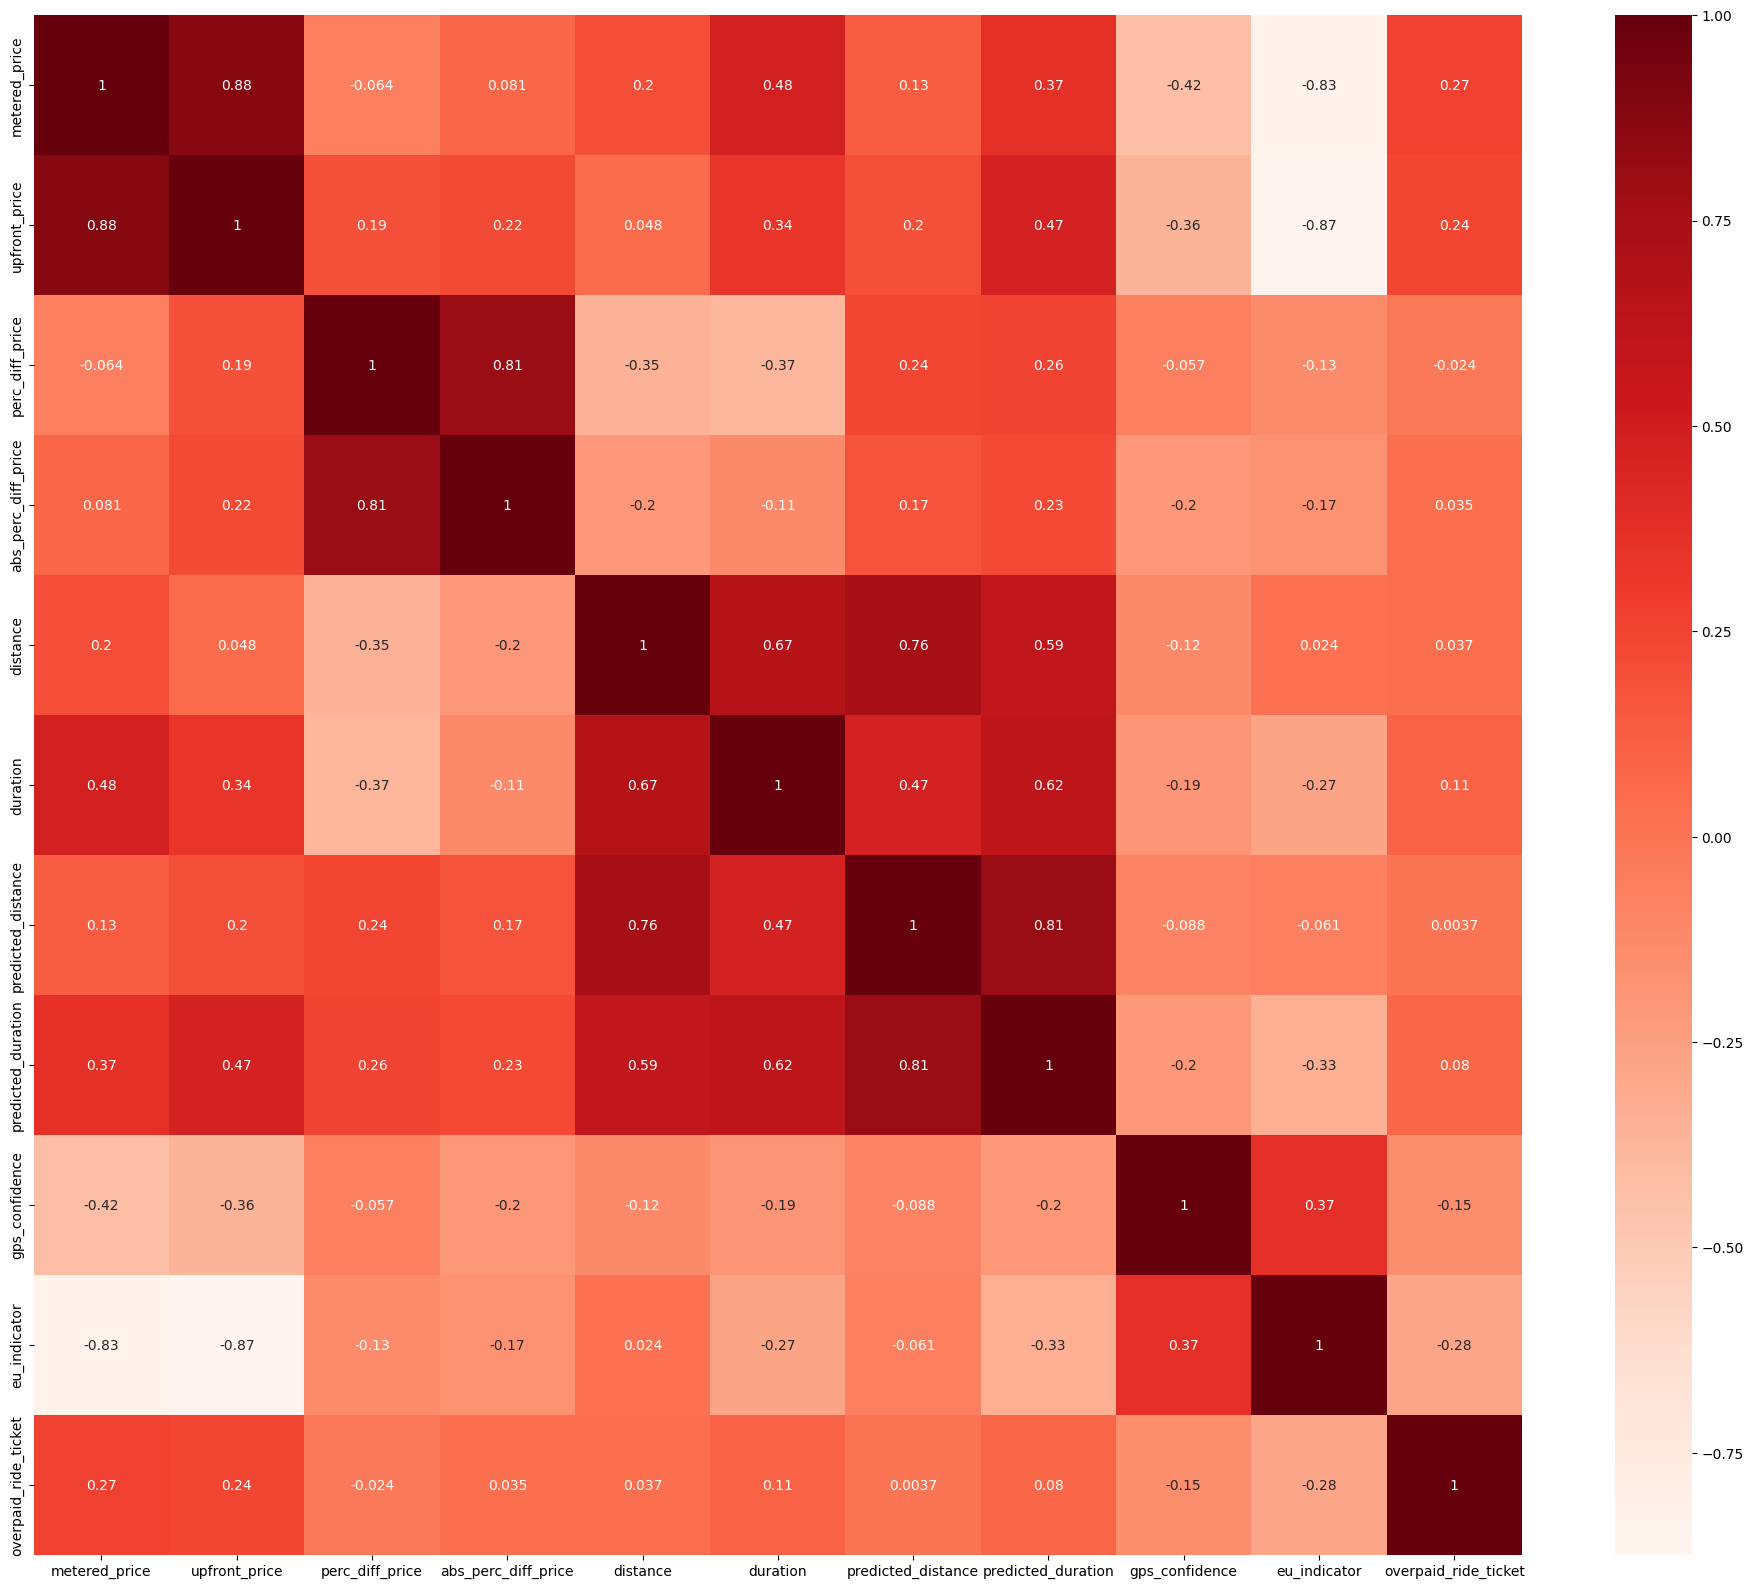

In [61]:
# check for correlation Using Pearson Correlation
plt.figure(figsize=(24,20))
cor = cleaned_df[columns_for_correlation].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [62]:
#Correlation with upfront_price variable
cor_target = abs(cor["metered_price"])

# Selecting highly correlated features
relevant_features = cor_target[cor_target>0.4]
relevant_features.sort_values(ascending=False)

# This may indicate that the algorithm used for upfront pricing is working well. However, it's still crucial to investigate further to identify any potential areas for improvement.

metered_price                    1.00
upfront_price                    0.88
eu_indicator                     0.83
duration                         0.48
gps_confidence                   0.42
Name: metered_price, dtype: float64

The strong correlation between metered price and eu_indicator and upfront price suggests that these factors may play a significant role in determining the final fare paid by riders. Specifically, the eu_indicator variable may indicate additional fees or regulations that impact the price, while upfront price reflects the predicted cost of the ride. 

The moderate correlation between metered price and duration and gps_confidence suggests that these variables may also play a role in determining the final fare, but to a lesser extent than eu_indicator and upfront price. Duration may be an important factor for calculating metered price, as it directly relates to the time spent on the ride. GPS accuracy, as indicated by gps_confidence, may also be related to distance accuracy, which is another key factor in calculating metered price.

Overall, these correlations suggest that several factors influence the final fare paid by riders. The company could consider further investigating these correlations to better understand their impact on pricing and potentially adjust their pricing model accordingly.

In [63]:
#Correlation with upfront_price variable
cor_target = abs(cor["upfront_price"])

# Selecting highly correlated features
relevant_features = cor_target[cor_target>0.4]
relevant_features.sort_values(ascending=False)

upfront_price                        1.00
metered_price                        0.88
eu_indicator                         0.87
predicted_duration                   0.47
Name: upfront_price, dtype: float64

The finding that upfront price is highly correlated with eu_indicator and moderately correlated with predicted duration suggests that these variables may be important predictors of upfront pricing. Specifically, the high correlation between upfront price and eu_indicator indicates that rides occurring within the EU tend to have different pricing structures or policies than those outside the EU. This could be due to differences in regulations, taxes, or other factors that affect pricing.

Meanwhile, the moderate correlation between upfront price and predicted duration suggests that the ride distance and time estimates provided by the predictive models used to calculate upfront prices are accurate to some extent. This correlation also indicates that the company's predictive models may need to be further refined to improve upfront pricing precision.

Overall, this information can help inform decisions related to improving upfront pricing precision by identifying potentially important predictors of upfront price and areas for model refinement.

## Analysing the data to identify the top 1 to 2 opportunities that can help improve upfront pricing precision

- In this phase, an assessment will be conducted to evaluate the overall precision of upfront pricing and model efficacy, as well as to identify potential opportunities that can enhance its precision. The analysis will involve examining the interaction between various factors and upfront pricing accuracy, using the percentage pricing difference and pricing category columns as key performance indicators for model evaluation.

- The total execution time will be computed for future reference.

### Analyzing the overall accuracy of upfront pricing accuracy and model performance

In [64]:
# percentage of accurate and inaccurate upfront price predictions
data = final_df['pricing_accuracy'].value_counts()
print(data)
fig = px.pie(values=data.to_list(), names=data.index.to_list(),
             title = "Distribution of Pricing Accuracy", width=700, height=400)
fig.show()

accurate      1974
inaccurate    1148
Name: pricing_accuracy, dtype: int64


In [65]:
# percentage of prediction_category in upfront price predictions
data = final_df['prediction_category'].value_counts()
print(data)
fig = px.pie(values=data.to_list(), names=data.index.to_list(),
             title = "Distribution of Prediction Category", width=700, height=400)
fig.show()

under_prediction    1757
over_prediction     1365
Name: prediction_category, dtype: int64


In [66]:
# percentage of prediction_category for inaccurate cases
data = final_df[final_df['pricing_accuracy']=='inaccurate']['prediction_category'].value_counts()
print(data)
fig = px.pie(values=data.to_list(), names=data.index.to_list(),
             title = "Distribution of Prediction Category for Inaccurate Cases", width=700, height=400)
fig.show()

under_prediction    765
over_prediction     383
Name: prediction_category, dtype: int64


In [67]:
# mean absoulte percentage difference for prediction_category
final_df[final_df['pricing_accuracy']=='inaccurate'].groupby('prediction_category')['abs_perc_diff_price'].mean()

prediction_category
over_prediction                   96.74
under_prediction                  32.55
Name: abs_perc_diff_price, dtype: float64

According to the model's performance evaluation, it has accurately predicted 63.2% of the rides. 

However, analysis indicates that the model has a tendency to under estimate upfront pricing, with 56.3% of rides being predicted lower than their actual price. In the cases where inaccurate predictions were made, almost 66.6% resulted in an under estimation of the actual price by an average of 32.55%. Conversely, in the remaining 33.4% of cases where over estimation occurred, the model performed even worse by predicting an average of 96.74% above the actual price.

### Impact of GPS confidence on upfront pricing accuracy

This will help us identify if GPS confidence affects the accuracy of upfront pricing.

In [68]:
# overall distribution of GPS confidence
data = final_df['gps_confidence'].value_counts()
print(data)
fig = px.pie(values=data.to_list(), names=data.index.to_list(),
             title = "Distribution of GPS confidence", width=700, height=400)
fig.show()

1    2866
0     256
Name: gps_confidence, dtype: int64


In [69]:
# distribution of GPS confidence in inaccurate upfront pricing cases
data = final_df[final_df['pricing_accuracy']=='inaccurate']['gps_confidence'].value_counts()
print(data)
fig = px.pie(values=data.to_list(), names=data.index.to_list(),
             title = "Distribution of GPS confidence for Inaccurate Cases", width=700, height=400)
fig.show()

1    992
0    156
Name: gps_confidence, dtype: int64


In [70]:
# Mean absolute percentage difference by GPS confidence
final_df.groupby('gps_confidence')['abs_perc_diff_price'].mean()

gps_confidence
0                  52.95
1                  22.08
Name: abs_perc_diff_price, dtype: float64

In [71]:
# Mean predicted_distance by GPS confidence
final_df.groupby('gps_confidence')['predicted_distance'].mean()

gps_confidence
0               8,321.88
1               6,872.90
Name: predicted_distance, dtype: float64

In [72]:
# Mean predicted_duration by GPS confidence
final_df.groupby('gps_confidence')['predicted_duration'].mean()

gps_confidence
0               1,184.20
1                 852.31
Name: predicted_duration, dtype: float64

In 13.6% of the instances where upfront pricing was inaccurate, the GPS confidence indicator was absent. Furthermore, when the GPS confidence is identified as false, it appears that the predictive model overestimates both predicted_distance and predicted_duration, leading to an increase in upfront_pricing.

### Impact of destination changes on upfront pricing accuracy

This will help us identify if changes in the destination during the ride affect the accuracy of upfront pricing.

In [73]:
# overall distribution of dest_change
data = final_df['dest_change'].value_counts()
print(data)
fig = px.pie(values=data.to_list(), names=data.index.to_list(),
             title = "Distribution of Destination Changed", width=700, height=400)
fig.show()

not_changed            3038
destination_changed      84
Name: dest_change, dtype: int64


In [74]:
# Mean absolute percentage difference by dest_change
final_df[final_df['pricing_accuracy']=='inaccurate'].groupby(['dest_change', 'prediction_category'])['abs_perc_diff_price'].mean()

dest_change          prediction_category
destination_changed  over_prediction                      57.81
                     under_prediction                     37.79
not_changed          over_prediction                      97.57
                     under_prediction                     32.31
Name: abs_perc_diff_price, dtype: float64

In [75]:
# distribution of dest_change in inaccurate upfront pricing cases
data = final_df[final_df['pricing_accuracy']=='inaccurate']['dest_change'].value_counts()
print(data)
fig = px.pie(values=data.to_list(), names=data.index.to_list(),
             title = "Distribution of Destination Changed for Inaccurate Cases", width=700, height=400)
fig.show()

not_changed            1107
destination_changed      41
Name: dest_change, dtype: int64


In [76]:
# Mean absolute percentage difference by dest_change
final_df[final_df['pricing_accuracy']=='inaccurate'].groupby(['dest_change', 'prediction_category'])['abs_perc_diff_price'].mean()

dest_change          prediction_category
destination_changed  over_prediction                      57.81
                     under_prediction                     37.79
not_changed          over_prediction                      97.57
                     under_prediction                     32.31
Name: abs_perc_diff_price, dtype: float64

Based on the analysis of the data, it was found that in only less than 3% of all rides, the destination was changed more than once. However, even in cases where the destination was not changed, the predictive model still showed inaccuracies. Therefore, it can be concluded that multiple changes in destination could not be identified as a primary factor affecting upfront pricing precision.

### Impact of app version on upfront pricing accuracy

This will help us identify if certain app versions tend to receive inaccurate upfront pricing. 

In [77]:
# overall distribution of rider_app_version_simple
data = final_df['rider_app_version_simple'].value_counts()
print(data)
fig = px.pie(values=data.to_list(), names=data.index.to_list(),
             title = "Distribution of Rider App Version Simple", width=700, height=400)
fig.show()

CA.5.XX    1591
CI.4.XX    1429
CA.4.XX      69
CI.3.XX      33
Name: rider_app_version_simple, dtype: int64


In [78]:
# overall distribution of driver_app_version_simple
data = final_df['driver_app_version_simple'].value_counts()
print(data)
fig = px.pie(values=data.to_list(), names=data.index.to_list(),
             title = "Distribution of Driver App Version Simple", width=700, height=400)
fig.show()

DA.4.3X    2135
DA.4.4X     570
DI.3.3X     322
DA.4.1X      65
DA.4.2X      21
DI.3.2X       9
Name: driver_app_version_simple, dtype: int64


In [79]:
# distribution of rides by rider_app_version
final_df['rider_app_version'].value_counts().transform(lambda x: x/x.sum()).head(10)

CI.4.17                   0.18
CI.4.19                   0.13
CA.5.44                   0.10
CA.5.43                   0.10
CA.5.42                   0.08
CI.4.18                   0.06
CA.5.46                   0.05
CA.5.45                   0.04
CA.5.36                   0.03
CI.4.14                   0.03
Name: rider_app_version, dtype: float64

In [80]:
# distribution of rider_app_version_simple in inaccurate upfront pricing cases
final_df[final_df['pricing_accuracy']=='inaccurate'].groupby('pricing_accuracy')['rider_app_version'].value_counts().transform(lambda x: x/x.sum()).head()

pricing_accuracy  rider_app_version
inaccurate        CI.4.17                             0.19
                  CI.4.19                             0.13
                  CA.5.43                             0.09
                  CA.5.44                             0.09
                  CA.5.42                             0.08
Name: rider_app_version, dtype: float64

In [81]:
# distribution of rides by driver_app_version
final_df['driver_app_version'].value_counts().transform(lambda x: x/x.sum()).head(10)

DA.4.39                   0.31
DA.4.37                   0.22
DA.4.42                   0.14
DA.4.31                   0.07
DA.4.34                   0.06
DA.4.41                   0.04
DI.3.33                   0.03
DI.3.34                   0.03
DI.3.36                   0.02
DA.4.35                   0.02
Name: driver_app_version, dtype: float64

In [82]:
# distribution of driver_app_version in inaccurate upfront pricing cases
final_df[final_df['pricing_accuracy']=='inaccurate'].groupby('pricing_accuracy')['driver_app_version'].value_counts().transform(lambda x: x/x.sum()).head()

pricing_accuracy  driver_app_version
inaccurate        DA.4.39                              0.29
                  DA.4.37                              0.22
                  DA.4.42                              0.14
                  DA.4.31                              0.06
                  DA.4.34                              0.06
Name: driver_app_version, dtype: float64

After the analysis, it has been found that there is no statistically significant correlation between pricing accuracy and the version of the application being used.

### Impact of devices on upfront pricing accuracy

This will help us identify if certain devices tend to receive inaccurate upfront pricing. 

In [83]:
# overall distribution of device_brand
data = final_df['device_brand'].value_counts().head(10)
print(data)
fig = px.pie(values=data.to_list(), names=data.index.to_list(),
             title = "Distribution of User Device Brand", width=700, height=400)
fig.show()

Samsung    1214
Huawei      601
Apple       331
Tecno       330
Xiaomi      226
Nokia        82
Infinix      81
Itel         39
Sony         37
LG           35
Name: device_brand, dtype: int64


In [84]:
# distribution of device_brand
final_df['device_brand'].value_counts().transform(lambda x: x/x.sum()).head(10)

Samsung                   0.39
Huawei                    0.19
Apple                     0.11
Tecno                     0.11
Xiaomi                    0.07
Nokia                     0.03
Infinix                   0.03
Itel                      0.01
Sony                      0.01
LG                        0.01
Name: device_brand, dtype: float64

In [85]:
# distribution of devices
final_df['device_name'].value_counts().transform(lambda x: x/x.sum()).head(10)

iPhone8,1                           0.02
Samsung SM-A505FN                   0.02
HUAWEI MAR-LX1A                     0.02
Samsung SM-G960F                    0.02
Samsung SM-A520F                    0.02
iPhone9,3                           0.02
HUAWEI KOB-L09                      0.02
HUAWEI ANE-LX1                      0.02
Samsung SM-G930F                    0.01
Samsung SM-A605FN                   0.01
Name: device_name, dtype: float64

In [86]:
# distribution of devices in inaccurate upfront pricing cases
final_df[final_df['pricing_accuracy']=='inaccurate'].groupby('pricing_accuracy')['device_name'].value_counts().transform(lambda x: x/x.sum()).head(10)

pricing_accuracy  device_name                   
inaccurate        TECNO MOBILE LIMITED TECNO B1p                   0.03
                  HUAWEI MAR-LX1A                                  0.02
                  Samsung SM-G960F                                 0.02
                  Samsung SM-A520F                                 0.02
                  iPhone8,1                                        0.02
                  Samsung SM-A505FN                                0.02
                  Samsung SM-A605FN                                0.02
                  HUAWEI POT-LX1                                   0.01
                  HUAWEI SNE-LX1                                   0.01
                  Samsung SM-A405FN                                0.01
Name: device_name, dtype: float64

After the analysis, it has been found that there is no statistically significant correlation between pricing accuracy and the device being used.

### Impact of distance and duration on upfront pricing accuracy

This will help us identify if the distance or duration affects inaccurate upfront pricing. 

In [87]:
# distribution of rides by distance_binned
fig = px.histogram(final_df, x="distance_binned",
             color='pricing_accuracy', barmode='group', text_auto='.0f',
             title="Distribution of Rides by Distance Binned", width=1000, height=700,  
             color_discrete_sequence=["#cc0000", "#6aa84f"]).update_xaxes(categoryorder="array", 
             categoryarray=['(-0.001, 2801.4]', '(2801.4, 4915.8]','(4915.8, 7315.0]', '(7315.0, 10963.2]', '(10963.2, 28042.0]'])
fig.show()

In [88]:
# distribution of rides by duration_binned
fig = px.histogram(final_df, x="duration_binned",
             color='pricing_accuracy', barmode='group', text_auto='.0f',
             title="Distribution of Rides by Duration Binned", width=1000, height=700, 
             color_discrete_sequence=["#cc0000", "#6aa84f"]).update_xaxes(categoryorder="array", 
             categoryarray=['(-0.001, 452.0]', '(452.0, 702.4]', '(702.4, 985.6]', '(985.6, 1410.6]', '(1410.6, 3853.0]'])
fig.show()

In [89]:
# distribution of rides by predicted_distance_binned
fig = px.histogram(final_df, x="predicted_distance_binned",
             color='pricing_accuracy', barmode='group', text_auto='.0f',
             title="Distribution of Rides by Predicted Distance Binned", width=1000, height=700, 
             color_discrete_sequence=["#cc0000", "#6aa84f"]).update_xaxes(categoryorder="array", categoryarray=['(20.999, 3227.4]', '(3227.4, 5017.6]', '(5017.6, 7065.6]', '(7065.6, 10191.6]', '(10191.6, 27960.0]'])
fig.show()

In [90]:
# distribution of rides by predicted_duration_binned
fig = px.histogram(final_df, x="predicted_duration_binned",
             color='pricing_accuracy', barmode='group', text_auto='.0f',
             title="Distribution of Rides by Predicted Duration Binned", width=1000, height=700, 
             color_discrete_sequence=["#cc0000", "#6aa84f"]).update_xaxes(categoryorder="array", categoryarray=['(1.999, 483.0]', '(483.0, 686.0]', '(686.0, 908.0]', '(908.0, 1221.0]', '(1221.0, 2586.0]'])
fig.show()

Based on the analysis, it was observed that the model performs slightly better when the duration or distance is on the middle bins (second, third, fourth among the 5) as compared to the higher and lower bins (first and fifth among 5). However, given that we deleted to handle outliers, this finding cannot be conclusively confirmed with the current amount of data.

### Impact of EU indicator on upfront pricing accuracy

This will help us identify if the rides in EU has more inaccurate upfront pricing or not. 

In [91]:
# overall distribution of eu_indicator
data = final_df['eu_indicator'].value_counts()
print(data)
fig = px.pie(values=data.to_list(), names=data.index.to_list(),
             title = "Distribution of EU Indicator", width=700, height=400)
fig.show()

1    2449
0     673
Name: eu_indicator, dtype: int64


In [92]:
# distribution of eu_indicator in inaccurate upfront pricing cases
data = final_df[final_df['pricing_accuracy']=='inaccurate']['eu_indicator'].value_counts()
print(data)
fig = px.pie(values=data.to_list(), names=data.index.to_list(),
             title = "Distribution of EU Indicator for Inaccurate Cases", width=700, height=400)
fig.show()

1    827
0    321
Name: eu_indicator, dtype: int64


In [93]:
# Percentage of inaccurate cases inside and outside Europe

(final_df[final_df['pricing_accuracy']=='inaccurate']['eu_indicator'].value_counts()/final_df['eu_indicator'].value_counts())*100

1                  33.77
0                  47.70
Name: eu_indicator, dtype: float64

In [94]:
# Mean absolute percentage difference by eu_indicator
final_df[final_df['pricing_accuracy']=='inaccurate'].groupby(['eu_indicator', 'prediction_category'])['abs_perc_diff_price'].mean()

eu_indicator  prediction_category
0             over_prediction                     102.65
              under_prediction                     40.99
1             over_prediction                      92.12
              under_prediction                     30.44
Name: abs_perc_diff_price, dtype: float64

In [95]:
# distribution of rides by eu_indicator and pricing_accuracy
fig = px.histogram(final_df, x="eu_indicator",
             color='pricing_accuracy', barmode='group', text_auto='.0f', width=1000, height=700, 
             title="Distribution of Rides by EU Indicator and Pricing Accuracy", color_discrete_sequence=["#cc0000", "#6aa84f"])
fig.show()

It was observed that instances of inaccurate upfront pricing were present in rides within Europe in 72% of the cases and 28% outside Europe. Additionally, the analysis indicates that rides outside Europe were predicted higher in comparison to those inside of Europe.

### Impact of time of day on upfront pricing accuracy

This will help us identify if the rides during a certain period of the day has more inaccurate upfront pricing or not. 

In [96]:
# distribution of rides by time_of_day
data = final_df['time_of_day'].value_counts().transform(lambda x: x/x.sum())
print(data)
fig = px.pie(values=data.to_list(), names=data.index.to_list(),
             title = "Distribution of Rides by Time of Day (the ride took place)", width=700, height=400)
fig.show()

12:00-17:59                   0.31
18:00-23:59                   0.27
06:00-11:59                   0.27
00:00-05:59                   0.16
Name: time_of_day, dtype: float64


In [97]:
# distribution of rides by time_of_day and pricing_accuracy
fig = px.histogram(final_df, x="time_of_day",
             color='pricing_accuracy', barmode='group', text_auto='.0f',
             title="Distribution of Rides by Time of Day and Pricing Accuracy", width=1000, height=700, 
             color_discrete_sequence=["#cc0000", "#6aa84f"]).update_xaxes(categoryorder="category ascending")
fig.show()

In [98]:
# distribution of rides by time_of_day and prediction_category
fig = px.histogram(final_df, x="time_of_day",
             color='prediction_category', barmode='group', text_auto='.0f', width=1000, height=700, 
             title="Distribution of rides by Time of Day and Prediction Category", 
             color_discrete_sequence=["#cc0000", "#6aa84f"]).update_xaxes(categoryorder="category ascending")
fig.show()

In [99]:
# Mean absolute percentage difference by time_of_day
final_df.groupby(['pricing_accuracy', 'time_of_day'])['abs_perc_diff_price'].mean()

pricing_accuracy  time_of_day
accurate          00:00-05:59                   6.28
                  06:00-11:59                   7.95
                  12:00-17:59                   8.34
                  18:00-23:59                   7.11
inaccurate        00:00-05:59                  56.89
                  06:00-11:59                  54.00
                  12:00-17:59                  47.34
                  18:00-23:59                  61.02
Name: abs_perc_diff_price, dtype: float64

In [100]:
# Mean absolute percentage difference by time_of_day in inaccurate upfront pricing cases
final_df[final_df['pricing_accuracy']=='inaccurate'].groupby(['time_of_day', 'prediction_category'])['abs_perc_diff_price'].mean()

time_of_day  prediction_category
00:00-05:59  over_prediction                      96.56
             under_prediction                     35.30
06:00-11:59  over_prediction                     109.19
             under_prediction                     31.92
12:00-17:59  over_prediction                      80.59
             under_prediction                     32.29
18:00-23:59  over_prediction                     103.30
             under_prediction                     32.36
Name: abs_perc_diff_price, dtype: float64

After the analysis, it has been found that the model tends to under predict slightly more during the peak hours - between 12pm till 6pm

In [101]:
# calculate total runtime
end_time = datetime.now()
print("Completed Task at", ": {}".format(datetime.strftime(end_time, "%Y/%m/%d::%H-%M-%S")))
time_duration = (end_time - start_time)
hours = int(time_duration.seconds // (60 * 60))
minutes = int((time_duration.seconds // 60) % 60)
print("Time taken to complete the task", ": {} hour(s) {} minute(s)".format(hours, minutes))

Completed Task at : 2023/06/20::15-10-33
Time taken to complete the task : 0 hour(s) 1 minute(s)


## Conclusion - Identified Oppurtunities for improvement

### Based on exploratory and missing data analysis

After analyzing the provided dataset, I found that upfront pricing is strongly correlated with predicted duration and predicted distance. On the other hand, metered pricing is strongly correlated with the EU indicator, actual distance, and actual duration. It was also observed that upfront pricing was missing in 31% of the rides, with 84.5% belonging to the price prediction type of prediction and 13.7% belonging to upfront destination changed. Poor GPS confidence was found in almost 40% of cases where upfront pricing was missing. 

Furthermore, in all instances where the change_reason_pricing was either driver_destination_changed or driver_waypoint_changed, upfront_price was found to be missing. In contrast, 77% of cases where change_reason_pricing was identified as client_destination_changed, upfront_price was also found to be missing. The prediction_price_type of upfront had 23 instances where upfront pricing is missing, which is unusual for this prediction type.

It was also found that upfront pricing accuracy is better within Europe than outside of it, as in 84% of cases where upfront_price was missing, the corresponding ride took place outside of Europe. Additionally, almost 68% of overpaid_ride_ticket cases were associated with poor GPS confidence and were outside of Europe.

Based on these findings, I suggest improving GPS connectivity and data collection outside of Europe to enhance upfront pricing accuracy. Implementing measures to ensure that upfront pricing is always available for client_destination_changed cases can also improve customer satisfaction and reduce complaints about overpaid rides.

## Based on Feature Engineering

Based on the business needs, I have conducted feature engineering to analyze the provided data set. One of the features I created was Percentage Pricing Difference, which calculates the percentage difference between the metered price and upfront price. Additionally, I classified the Absolute Percentage Pricing Difference into two categories: accurate and inaccurate. A difference of less than or equal to 20% was classified as accurate, while a difference greater than 20% was classified as inaccurate. This helped me determine the pricing accuracy of the upfront pricing system.

Furthermore, in order to understand the pricing trends, I also classified Percentage Pricing Difference into two categories: under prediction and over prediction. Under prediction occurs when the percentage difference between metered price and upfront price is negative. 

The under prediction and over prediction of upfront pricing are important because they directly affect the customer experience and their perception of the ride-hailing service. When the upfront price is under predicted, customers end up paying more than they initially expected, which can lead to dissatisfaction and a negative perception of the service. Conversely, when the upfront price is over predicted, customers may feel that they are receiving a good deal but may not trust future ride estimates if they continue to consistently over predict prices.

Therefore, understanding the trends in under prediction and over prediction is crucial for improving upfront pricing accuracy and gaining customer trust. By accurately predicting ride costs, ride-hailing companies can provide reliable and transparent pricing estimates to their customers, which ultimately leads to increased customer satisfaction and loyalty.

## Based on the Final Correlation Matrix

I have found that upfront price is strongly correlated with metered price, EU indicator, and predicted duration. Similarly, metered price is correlated with upfront price, EU indicator, actual duration, and GPS confidence.

From a business perspective, this implies that improving the accuracy of predicted durations and distances could lead to a better upfront pricing system. Additionally, ensuring good GPS connectivity during rides could help improve the accuracy of metered prices. It's also worth noting that the EU indicator appears to play a role in both upfront and metered prices, which may be due to differences in regulations or pricing structures within the European market.

In order to improve upfront pricing precision for our customers' smooth journeys, we can invest in better predictive algorithms that take into account factors such as traffic patterns and road conditions. We can also work on improving GPS connectivity during rides by optimizing our technology or partnering with other companies that specialize in this area.

## Based on Analyzing the overall accuracy of upfront pricing accuracy and model performance

It can be inferred that the upfront pricing model has an overall accuracy of 63.2%. However, there are clear discrepancies between predicted and actual prices, with the model tending to under estimate upfront pricing in 56.3% of rides. This is concerning since it may lead to customer dissatisfaction and complaints about overpaid rides. 

Furthermore, the study found that when inaccurate predictions were made, 66.6% resulted in under estimation of actual price by an average of 32.55%. This suggests that the model may not be considering all relevant factors while predicting a ride's cost. Additionally, in cases where over estimation occurred, the model performed even worse by predicting an average of 96.74% above the actual price.

To improve upfront pricing precision, it may be beneficial to investigate why the model tends to under estimate upfront pricing and determine if there are any factors that are not currently being considered in the prediction process. For example, it may be useful to consider peak hours, weather conditions, traffic patterns, or other external factors that could impact ride pricing.

## Based on Anlayzing the various feature's impact on upfront pricing accuracy

Based on the analysis, I discovered that GPS confidence plays a significant role in predicting upfront pricing accurately. When GPS confidence is absent, it negatively affects upfront pricing accuracy. Hence, it is recommended to improve GPS accuracy or implement alternative methods for location tracking to increase upfront pricing precision.

The analysis also revealed that multiple destination changes had negligible effects on upfront pricing accuracy. However, the predictive model still showed inaccuracies in cases where there were no destination changes. This finding suggests that additional factors are affecting the predictive model's ability to predict accurate prices.

I found no statistically significant correlation between upfront pricing accuracy, application version, and device type used by riders. Therefore, it is recommended to focus on other factors that can contribute to upfront pricing accuracy rather than device or app versions.

The model performed slightly better when duration or distance was further from outliers. However, given our data's limited nature, this finding cannot be conclusively confirmed without further analysis.

It is worth noting that rides outside Europe have a higher absolute percentage difference and tend to show more instances of inaccurate upfront pricing than rides inside Europe. This suggests that the predictive model may need adjustment or recalibration based on region-specific factors that might affect ride charges.

Finally, the analysis revealed peak hours between 12 pm till 6 pm tend to under predict slightly more. With this in mind, we can consider tweaking the predictive models' parameters to account for rush hour traffic and other related factors.